In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
df_raw = pd.read_csv('/Users/alexandersteven/Desktop/ID:X Partner/loan_data_2007_2014.csv', index_col = 0)

In [3]:
df_raw

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_columns', None)
df_raw.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Explore Data

In [5]:
df_raw.shape

(466285, 74)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [7]:
## Check Duplicated ID

df_raw.id.nunique()

466285

In [8]:
cols_to_drop = {
    'id', 'member_id',
    'url', 'desc',
    
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'zip_code'
}

In [9]:
df_raw = df_raw.drop(cols_to_drop, axis = 1)

In [10]:
df_raw.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


## Target Variable

Since this prediction is to determine whether or not a person is able to pay off their loan, we're going to take a look at 'loan_status' variable as our target variable

In [11]:
df_raw.loan_status.value_counts(normalize = True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

We are going to separate the user into good and bad loaner based on the loan status

In [12]:
bad_status = [
    'Charged Off',
    'Default',
    'Late (31-120 days)',
    'Does not meet the credit policy. Status:Charged Off'
]

df_raw['bad_flag'] = np.where(df_raw['loan_status'].isin(bad_status), 1, 0)

In [13]:
df_raw['bad_flag'].value_counts(normalize = True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

In [14]:
df_raw.drop('loan_status', axis = 1, inplace = True)

## Data Cleaning, Preprocessing, and Feature Engineering

### term

Change the term from 36 months to '36'

In [15]:
df_raw['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [16]:
df_raw['term_int'] = df_raw['term'].str.replace(' months', '')
df_raw['term_int'] = df_raw['term_int'].astype(float)

In [17]:
df_raw.drop('term', axis = 1, inplace = True)

### emp_length

Remove the 'years' text

In [18]:
df_raw['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
df_raw['emp_length_int'] = df_raw['emp_length'].str.replace('\+ years', '')
df_raw['emp_length_int'] = df_raw['emp_length_int'].str.replace('< 1 year', str(0))
df_raw['emp_length_int'] = df_raw['emp_length_int'].str.replace(' years', '')
df_raw['emp_length_int'] = df_raw['emp_length_int'].str.replace(' year', '')

In [20]:
df_raw['emp_length_int'] = df_raw['emp_length_int'].astype(float)

In [21]:
df_raw.drop('emp_length', axis = 1, inplace = True)

### issue_d

Change the data format into yyyy-mm-dd first, and then we are using '2014-12-01' as our reference date to calculate the number of days passed since it is issued

In [22]:
df_raw['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [23]:
df_raw['issue_d_date'] = pd.to_datetime(df_raw['issue_d'], format = '%b-%y')
df_raw['issue_d_date'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d_date, dtype: datetime64[ns]

In [24]:
df_raw['months_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_raw['issue_d_date']) / np.timedelta64(1, 'M')))

In [25]:
df_raw['months_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: months_since_issue_d, dtype: float64

In [26]:
df_raw.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### earliest_cr_line

In [27]:
df_raw['earliest_cr_line_date'] = pd.to_datetime(df_raw['earliest_cr_line'], format = '%b-%y')
df_raw['earliest_cr_line_date'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [28]:
df_raw['adj_earliest_cr_line_date'] = df_raw['earliest_cr_line_date'] - np.where(df_raw['earliest_cr_line_date'].dt.year > 2017, pd.DateOffset(years=100), pd.DateOffset(years=0))

In [29]:
df_raw['months_since_earliest_cr_line_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_raw['adj_earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [30]:
df_raw['months_since_earliest_cr_line_date'].head()

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: months_since_earliest_cr_line_date, dtype: float64

In [31]:
df_raw['months_since_earliest_cr_line_date'].describe()

count    466256.000000
mean        242.491078
std          86.928944
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: months_since_earliest_cr_line_date, dtype: float64

In [32]:
df_raw.drop(['earliest_cr_line', 'earliest_cr_line_date', 'adj_earliest_cr_line_date'], axis=1, inplace=True)

### last_pymnt_d

In [33]:
df_raw['last_pymnt_d_date'] = pd.to_datetime(df_raw['last_pymnt_d'], format = '%b-%y')
df_raw['last_pymnt_d_date'].head()

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-01-01
Name: last_pymnt_d_date, dtype: datetime64[ns]

In [34]:
df_raw['months_since_last_pymnt_d_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_raw['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [35]:
df_raw['months_since_last_pymnt_d_date'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: months_since_last_pymnt_d_date, dtype: float64

In [36]:
df_raw.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis = 1, inplace = True)

In [37]:
df_raw['months_since_last_pymnt_d'] = df_raw['months_since_last_pymnt_d_date']

In [38]:
df_raw.drop(['months_since_last_pymnt_d_date'], axis = 1, inplace = True)

### next_pymnt_d

In [39]:
df_raw['next_pymnt_d_date'] = pd.to_datetime(df_raw['next_pymnt_d'], format = '%b-%y')
df_raw['next_pymnt_d_date'].head()

0          NaT
1          NaT
2          NaT
3          NaT
4   2016-02-01
Name: next_pymnt_d_date, dtype: datetime64[ns]

In [40]:
df_raw['months_since_next_pymnt_d_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_raw['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [41]:
df_raw['months_since_next_pymnt_d_date'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: months_since_next_pymnt_d_date, dtype: float64

In [42]:
df_raw.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis = 1, inplace = True)

In [43]:
df_raw['months_since_next_pymnt_d'] = df_raw['months_since_next_pymnt_d_date']

In [44]:
df_raw.drop(['months_since_next_pymnt_d'], axis = 1, inplace = True)

### last_credit_pull_d

In [45]:
df_raw['last_credit_pull_d_date'] = pd.to_datetime(df_raw['last_credit_pull_d'], format = '%b-%y')
df_raw['last_credit_pull_d_date'].head()

0   2016-01-01
1   2013-09-01
2   2016-01-01
3   2015-01-01
4   2016-01-01
Name: last_credit_pull_d_date, dtype: datetime64[ns]

In [46]:
df_raw['months_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df_raw['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [47]:
df_raw['months_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: months_since_last_credit_pull_d, dtype: float64

## Exploratory Data Analysis (EDA)

### Correlation Check

<AxesSubplot:>

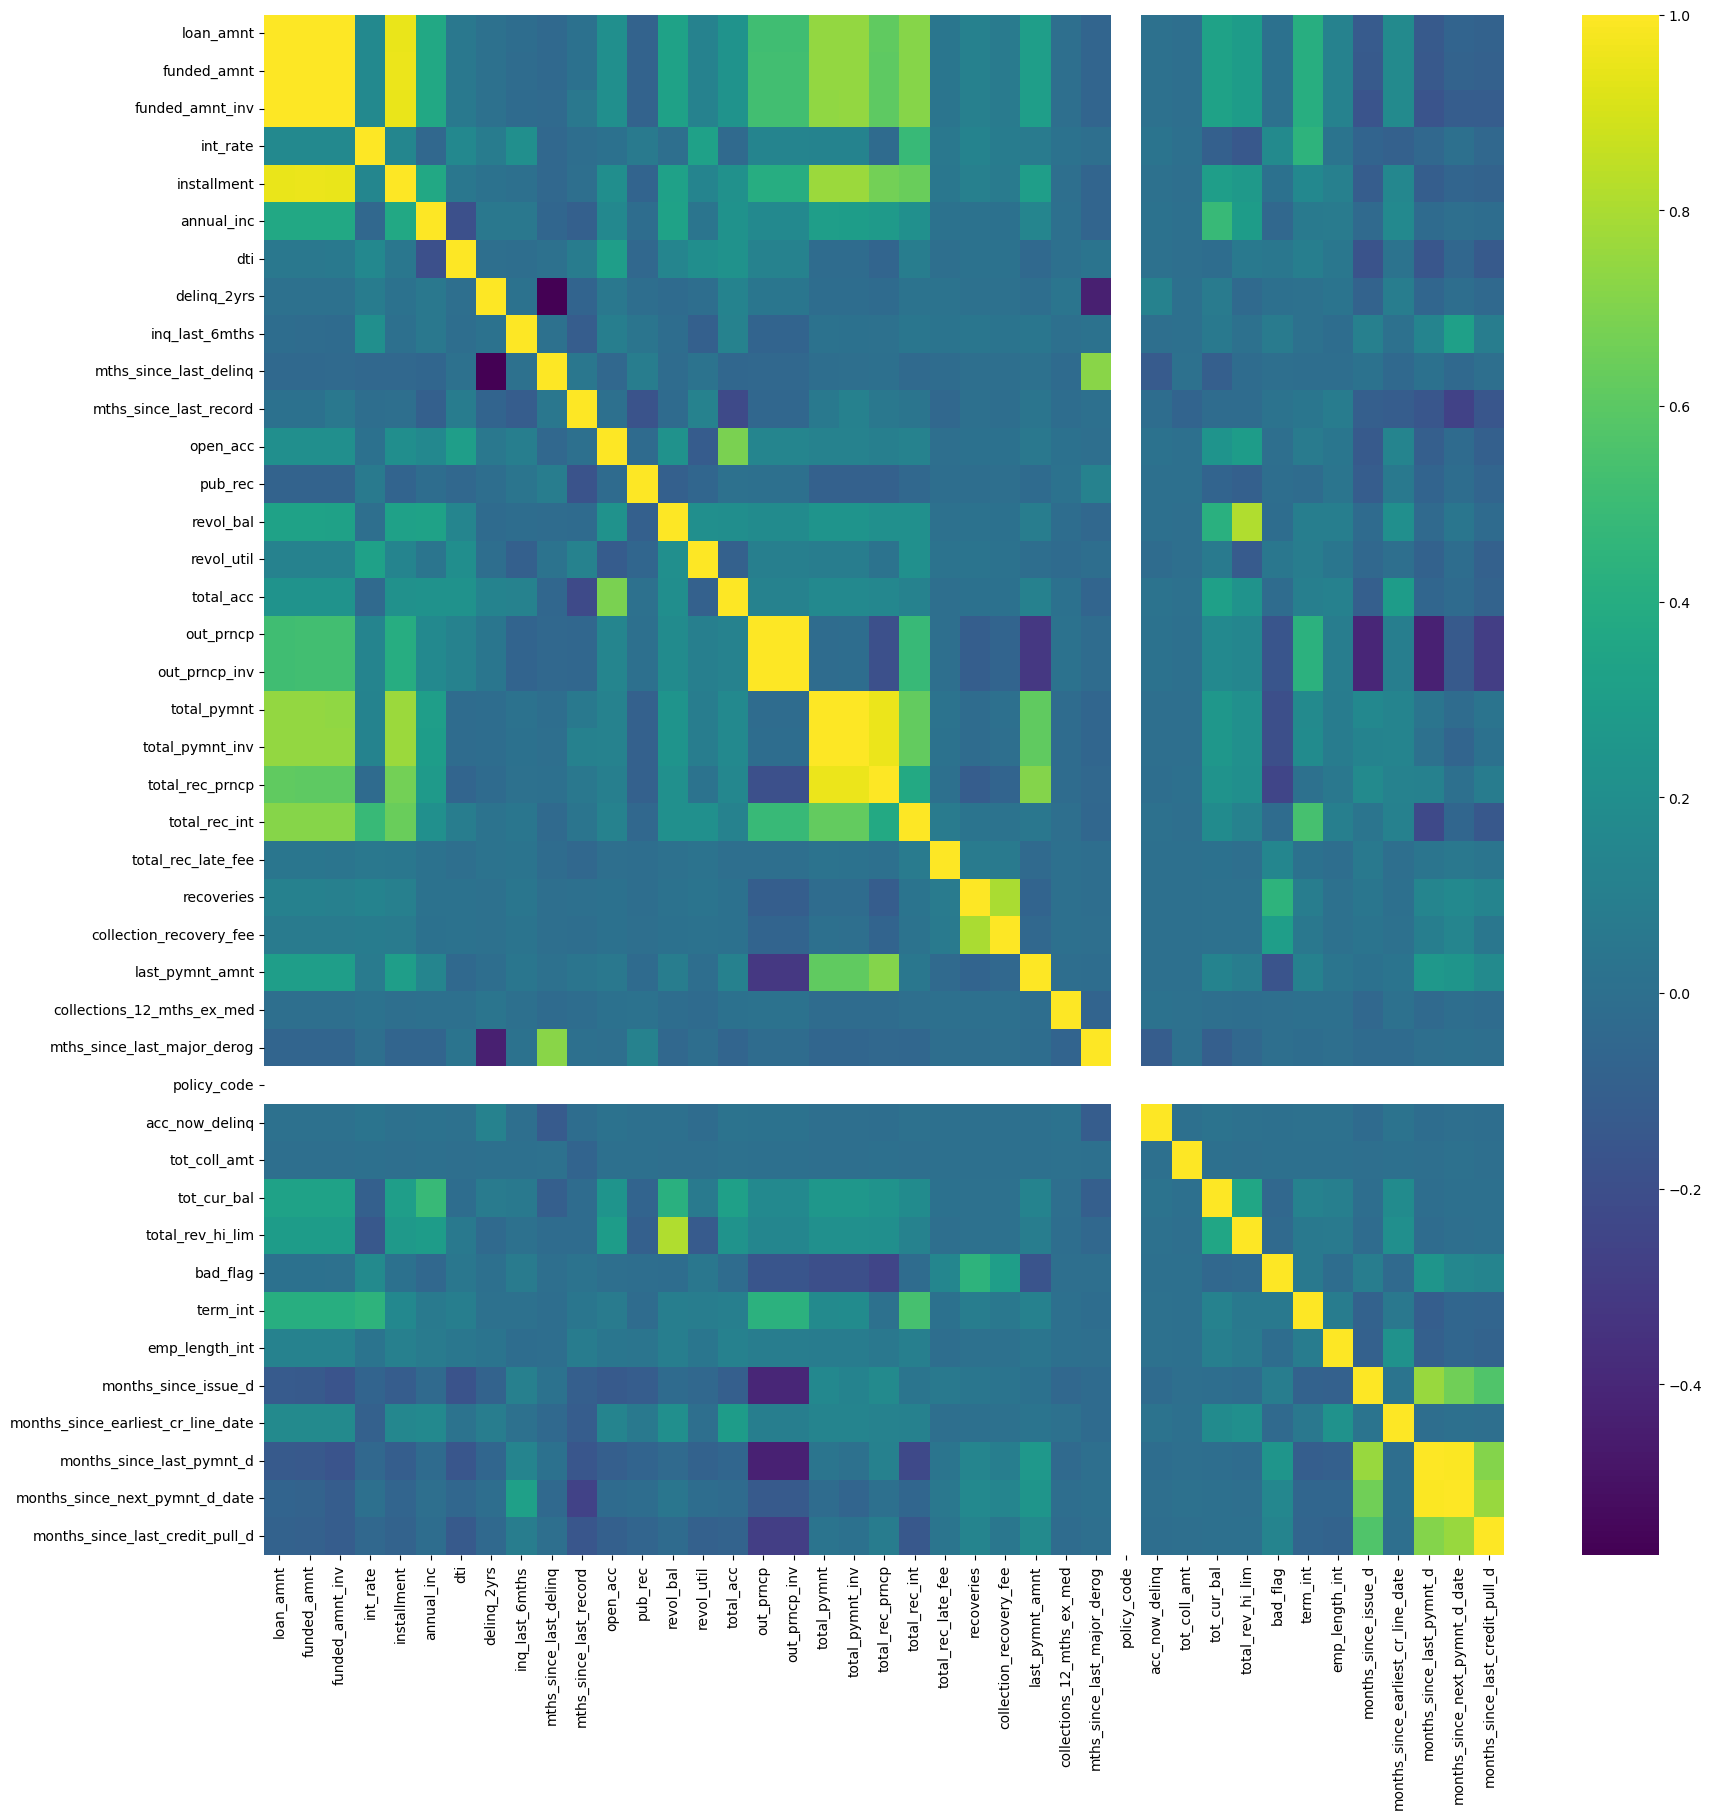

In [48]:
plt.figure(figsize = (20,20))
sns.heatmap(df_raw.corr(), cmap='viridis')

We are going to drop columns that has high correlation more than 70%.

In [49]:
corr_matrix = df_raw.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [50]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'months_since_last_pymnt_d',
 'months_since_next_pymnt_d_date',
 'months_since_last_credit_pull_d']

In [51]:
df_raw.drop(to_drop_hicorr, axis = 1, inplace = True)

### Check Categorical Features

In [52]:
df_raw.select_dtypes(include = 'object').nunique()

grade                       7
sub_grade                  35
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
last_credit_pull_d        103
application_type            1
dtype: int64

We are going to drop features that have a very high cardinality and the feature that only has one unique value.

In [53]:
df_raw.drop(['emp_title', 'title', 'application_type'], axis = 1, inplace = True)

In [54]:
for col in df_raw.select_dtypes(include='object').columns.tolist():
    print(df_raw[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


B3    6.795415
B4    6.542136
C1    5.780370
C2    5.734690
B2    5.706810
C3    5.429512
B5    5.415572
C4    5.169585
B1    4.906012
C5    4.756319
A5    4.666030
D1    4.130735
A4    4.084412
D2    3.655704
D3    3.198902
D4    3.023687
A3    2.695347
D5    2.480457
A2    2.349636
A1    2.260635
E1    1.937227
E2    1.859163
E3    1.496081
E4    1.285051
E5    1.090964
F1    0.844977
F2    0.643598
F3    0.580761
F4    0.443291
F5    0.324480
G1    0.237837
G2    0.176501
G3    0.125031
G4    0.090503
G5    0.082568
Name: sub_grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n   

We are also going to drop column where the value is dominated by one value only

In [55]:
df_raw.drop(['pymnt_plan'], axis = 1, inplace = True)

In [56]:
df_raw.select_dtypes(exclude = 'object').nunique()

loan_amnt                               1352
int_rate                                 506
annual_inc                             31901
dti                                     3997
delinq_2yrs                               24
inq_last_6mths                            28
mths_since_last_delinq                   145
mths_since_last_record                   123
open_acc                                  62
pub_rec                                   26
revol_bal                              58142
revol_util                              1269
total_acc                                112
out_prncp                             135665
total_rec_late_fee                      5808
recoveries                             22773
collections_12_mths_ex_med                 9
policy_code                                1
acc_now_delinq                             6
tot_coll_amt                            6321
tot_cur_bal                           220690
bad_flag                                   2
term_int  

In [57]:
df_raw.drop(['policy_code'], axis = 1, inplace = True)

## Missing Values

### Missing Values Checking

In [58]:
missing_values = df_raw.isnull().sum() * 100 / df_raw.shape[0]
missing_values[missing_values > 0 ].sort_values(ascending = False)

mths_since_last_record                86.566585
mths_since_last_delinq                53.690554
tot_cur_bal                           15.071469
tot_coll_amt                          15.071469
emp_length_int                         4.505399
revol_util                             0.072917
collections_12_mths_ex_med             0.031097
last_credit_pull_d_date                0.009007
last_credit_pull_d                     0.009007
acc_now_delinq                         0.006219
months_since_earliest_cr_line_date     0.006219
total_acc                              0.006219
delinq_2yrs                            0.006219
pub_rec                                0.006219
open_acc                               0.006219
inq_last_6mths                         0.006219
annual_inc                             0.000858
dtype: float64

We are going to drop column that has more than 75% missing values

In [59]:
df_raw.drop(['mths_since_last_record'], axis = 1, inplace = True)

### Missing Values Filling


In [60]:
df_raw['annual_inc'].fillna(df_raw['annual_inc'].mean(), inplace = True)
df_raw['mths_since_last_delinq'].fillna(-1, inplace = True)

In [61]:
missing_values = df_raw.isnull().sum() * 100 / df_raw.shape[0]
missing_values[missing_values > 0 ].sort_values(ascending = False)

tot_coll_amt                          15.071469
tot_cur_bal                           15.071469
emp_length_int                         4.505399
revol_util                             0.072917
collections_12_mths_ex_med             0.031097
last_credit_pull_d                     0.009007
last_credit_pull_d_date                0.009007
delinq_2yrs                            0.006219
inq_last_6mths                         0.006219
open_acc                               0.006219
pub_rec                                0.006219
total_acc                              0.006219
acc_now_delinq                         0.006219
months_since_earliest_cr_line_date     0.006219
dtype: float64

In [62]:
df_raw.isnull().sum().sort_values(ascending = False)

tot_cur_bal                           70276
tot_coll_amt                          70276
emp_length_int                        21008
revol_util                              340
collections_12_mths_ex_med              145
last_credit_pull_d                       42
last_credit_pull_d_date                  42
months_since_earliest_cr_line_date       29
delinq_2yrs                              29
inq_last_6mths                           29
open_acc                                 29
pub_rec                                  29
total_acc                                29
acc_now_delinq                           29
purpose                                   0
annual_inc                                0
months_since_issue_d                      0
grade                                     0
term_int                                  0
bad_flag                                  0
sub_grade                                 0
home_ownership                            0
total_rec_late_fee              

In [63]:
for col in df_raw.columns:
    df_raw[col].fillna(0, inplace=True)

In [64]:
df_raw.isnull().sum()

loan_amnt                             0
int_rate                              0
grade                                 0
sub_grade                             0
home_ownership                        0
annual_inc                            0
verification_status                   0
purpose                               0
addr_state                            0
dti                                   0
delinq_2yrs                           0
inq_last_6mths                        0
mths_since_last_delinq                0
open_acc                              0
pub_rec                               0
revol_bal                             0
revol_util                            0
total_acc                             0
initial_list_status                   0
out_prncp                             0
total_rec_late_fee                    0
recoveries                            0
last_credit_pull_d                    0
collections_12_mths_ex_med            0
acc_now_delinq                        0


In [65]:
data = df_raw

In [66]:
data.head(5)

,loan_amnt,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,bad_flag,term_int,emp_length_int,months_since_issue_d,months_since_earliest_cr_line_date,last_credit_pull_d_date
0,5000,10.65,B,B2,RENT,24000.0,Verified,credit_card,AZ,27.65,0.0,1.0,-1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.00,0.00,Jan-16,0.0,0.0,0.0,0.0,0,36.0,10.0,72.0,395.0,2016-01-01 00:00:00
1,2500,15.27,C,C4,RENT,30000.0,Source Verified,car,GA,1.00,0.0,5.0,-1.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.00,117.08,Sep-13,0.0,0.0,0.0,0.0,1,60.0,0.0,72.0,224.0,2013-09-01 00:00:00
2,2400,15.96,C,C5,RENT,12252.0,Not Verified,small_business,IL,8.72,0.0,2.0,-1.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.00,0.00,Jan-16,0.0,0.0,0.0,0.0,0,36.0,10.0,72.0,193.0,2016-01-01 00:00:00
3,10000,13.49,C,C1,RENT,49200.0,Source Verified,other,CA,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,16.97,0.00,Jan-15,0.0,0.0,0.0,0.0,0,36.0,10.0,72.0,262.0,2015-01-01 00:00:00
4,3000,12.69,B,B5,RENT,80000.0,Source Verified,other,OR,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,0.00,0.00,Jan-16,0.0,0.0,0.0,0.0,0,60.0,1.0,72.0,263.0,2016-01-01 00:00:00


In [67]:
data.isnull().sum()

loan_amnt                             0
int_rate                              0
grade                                 0
sub_grade                             0
home_ownership                        0
annual_inc                            0
verification_status                   0
purpose                               0
addr_state                            0
dti                                   0
delinq_2yrs                           0
inq_last_6mths                        0
mths_since_last_delinq                0
open_acc                              0
pub_rec                               0
revol_bal                             0
revol_util                            0
total_acc                             0
initial_list_status                   0
out_prncp                             0
total_rec_late_fee                    0
recoveries                            0
last_credit_pull_d                    0
collections_12_mths_ex_med            0
acc_now_delinq                        0


### Feature Scaling

Categorical Columns will be standardized using OneHotEncoding

In [68]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [69]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [70]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,last_credit_pull_d_Apr-09,last_credit_pull_d_Apr-10,last_credit_pull_d_Apr-11,last_credit_pull_d_Apr-12,last_credit_pull_d_Apr-13,last_credit_pull_d_Apr-14,last_credit_pull_d_Apr-15,last_credit_pull_d_Aug-07,last_credit_pull_d_Aug-08,last_credit_pull_d_Aug-09,last_credit_pull_d_Aug-10,last_credit_pull_d_Aug-11,last_credit_pull_d_Aug-12,last_credit_pull_d_Aug-13,last_credit_pull_d_Aug-14,last_credit_pull_d_Aug-15,last_credit_pull_d_Dec-07,last_credit_pull_d_Dec-08,last_credit_pull_d_Dec-09,last_credit_pull_d_Dec-10,last_credit_pull_d_Dec-11,last_credit_pull_d_Dec-12,last_credit_pull_d_Dec-13,last_credit_pull_d_Dec-14,last_credit_pull_d_Dec-15,last_credit_pull_d_Feb-08,last_credit_pull_d_Feb-09,last_credit_pull_d_Feb-10,last_credit_pull_d_Feb-11,last_credit_pull_d_Feb-12,last_credit_pull_d_Feb-13,last_credit_pull_d_Feb-14,last_credit_pull_d_Feb-15,last_credit_pull_d_Jan-08,last_credit_pull_d_Jan-09,last_credit_pull_d_Jan-10,last_credit_pull_d_Jan-11,last_credit_pull_d_Jan-12,last_credit_pull_d_Jan-13,last_credit_pull_d_Jan-14,last_credit_pull_d_Jan-15,last_credit_pull_d_Jan-16,last_credit_pull_d_Jul-07,last_credit_pull_d_Jul-08,last_credit_pull_d_Jul-09,last_credit_pull_d_Jul-10,last_credit_pull_d_Jul-11,last_credit_pull_d_Jul-12,last_credit_pull_d_Jul-13,last_credit_pull_d_Jul-14,last_credit_pull_d_Jul-15,last_credit_pull_d_Jun-07,last_credit_pull_d_Jun-08,last_credit_pull_d_Jun-09,last_credit_pull_d_Jun-10,last_credit_pull_d_Jun-11,last_credit_pull_d_Jun-12,last_credit_pull_d_Jun-13,last_credit_pull_d_Jun-14,last_credit_pull_d_Jun-15,last_credit_pull_d_Mar-08,last_credit_pull_d_Mar-09,last_credit_pull_d_Mar-10,last_credit_pull_d_Mar-11,last_credit_pull_d_Mar-12,last_credit_pull_d_Mar-13,last_credit_pull_d_Mar-14,last_credit_pull_d_Mar-15,last_credit_pull_d_May-07,last_credit_pull_d_May-08,last_credit_pull_d_May-09,last_credit_pull_d_May-10,last_credit_pull_d_May-11,last_credit_pull_d_May-12,last_credit_pull_d_May-13,last_credit_pull_d_May-14,last_credit_pull_d_May-15,last_credit_pull_d_Nov-07,last_credit_pull_d_Nov-09,last_credit_pull_d_Nov-10,last_credit_pull_d_Nov-11,last_credit_pull_d_Nov-12,last_credit_pull_d_Nov-13,last_credit_pull_d_Nov-14,last_credit_pull_d_Nov-15,last_credit_pull_d_Oct-07,last_credit_pull_d_Oct-08,last_credit_pull_d_Oct-09,last_credit_pull_d_Oct-10,last_credit_pull_d_Oct-11,last_credit_pull_d_Oct-12,last_credit

In [71]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

Numerical Columns will be standardized using StandardScaler

In [72]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [73]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,term_int,emp_length_int,months_since_issue_d,months_since_earliest_cr_line_date
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-0.616225,1.138605,1.446626,1.754215
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,1.622784,-1.523744,1.446626,-0.212497
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-0.616225,1.138605,1.446626,-0.569035
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-0.616225,1.138605,1.446626,0.224550
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.622784,-1.257509,1.446626,0.236051


In [74]:
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis=1)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
X_train.shape, X_test.shape

((373028, 339), (93257, 339))

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [80]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
pd.set_option('display.max_rows', None)
df_all_features

,feature,importance
330,recoveries,3.986108e-01
328,out_prncp,8.665564e-02
329,total_rec_late_fee,8.430478e-02
151,last_credit_pull_d_Jan-16,6.495007e-02
317,int_rate,5.344867e-02
337,months_since_issue_d,3.486874e-02
3,grade_E,3.288267e-02
335,term_int,2.640693e-02
4,grade_F,2.174288e-02
219,last_credit_pull_d_date_2015-12-01 00:00:00,1.846112e-02


In [81]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score

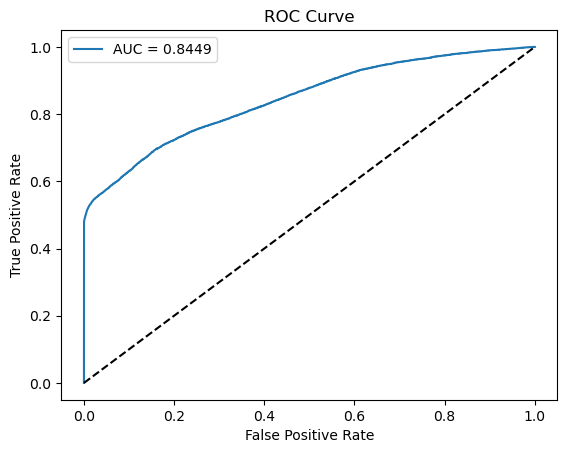

In [83]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [84]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [85]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,308936,0,0.060942,1,0,1,0.000011,0.0,0.000012
1,384057,0,0.061080,2,0,2,0.000021,0.0,0.000024
2,380198,0,0.061102,3,0,3,0.000032,0.0,0.000036
3,432478,0,0.061109,4,0,4,0.000043,0.0,0.000048
4,396049,0,0.061147,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5363')

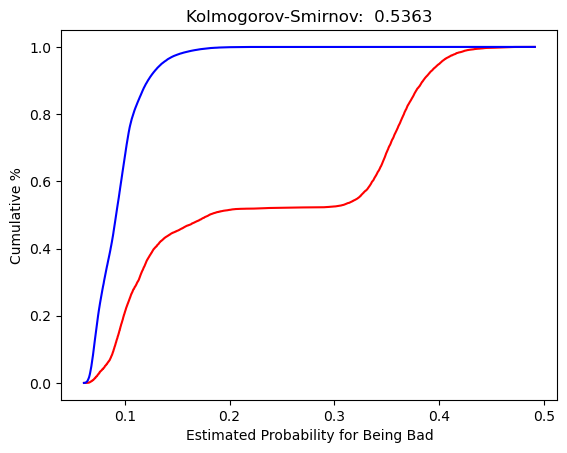

In [86]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)